Titanic

In this competition we have data about Titanic's passengers. The data is divided into two files: train and test. In "train" file a column "Survival" shows whether the passenger survived or not.

At first I explore the data, modify it and create some new features, then I select the most important of them and make a prediction using Random Forest.



In [238]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel 

In [239]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')


In [240]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
df_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Serepeca, Miss. Augusta",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [242]:
df_train.describe(include ='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Serepeca, Miss. Augusta",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [243]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [244]:
df_train.pivot_table(df_train,index=['Pclass','Survived'], aggfunc={'PassengerId' : ['count']})

PassengerId
                      count
Pclass Survived            
1      0                 80
       1                136
2      0                 97
       1                 87
3      0                372
       1                119

In [245]:
df_train.pivot_table('PassengerId','Pclass','Survived','count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


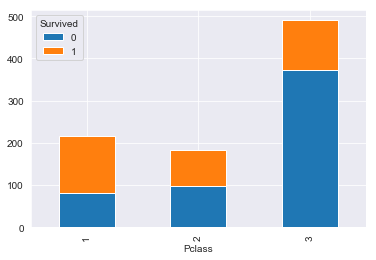

In [246]:

df_train.pivot_table('PassengerId','Pclass','Survived','count').plot(kind ='bar',stacked = True)

In [247]:
df_train['Title'] = df_train['Name'].apply(lambda x: (re.search(' ([a-zA-Z]+)\.', x)).group(1))
df_test['Title'] = df_test['Name'].apply(lambda x: (re.search(' ([a-zA-Z]+)\.', x)).group(1))

In [248]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Jonkheer      1
Mme           1
Don           1
Capt          1
Countess      1
Lady          1
Sir           1
Name: Title, dtype: int64

In [249]:
titles = {'Capt':       'Officer',
          'Col':        'Officer',
          'Major':      'Officer',
          'Jonkheer':   'Royalty',
          'Don':        'Royalty',
          'Sir' :       'Royalty',
          'Dr':         'Officer',
          'Rev':        'Officer',
          'Countess':   'Royalty',
          'Dona':       'Royalty',
          'Mme':        'Mrs',
          'Mlle':       'Miss',
          'Ms':         'Mrs',
          'Mr' :        'Mr',
          'Mrs' :       'Mrs',
          'Miss' :      'Miss',
          'Master' :    'Master',
          'Lady' :      'Royalty'
                    } 

In [250]:
for k,v in titles.items():
    df_train.loc[df_train['Title']==k, 'Title'] = v
    df_test.loc[df_test['Title']==k, 'Title'] = v
    

In [251]:
df_train['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [252]:
df_train['Age'].isnull().sum()

177

In [253]:
print(df_train.groupby(['Pclass','Sex','Title'])['Age'].median())



Pclass  Sex     Title  
1       female  Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        male    Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
2       female  Miss       24.0
                Mrs        31.5
        male    Master      1.0
                Mr         31.0
                Officer    46.5
3       female  Miss       18.0
                Mrs        31.0
        male    Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [254]:
df_train['Age'] = df_train.groupby(['Pclass','Sex','Title'])['Age'].apply(lambda x : x.fillna(x.median()))
df_test['Age'] = df_test.groupby(['Pclass','Sex','Title'])['Age'].apply(lambda x : x.fillna(x.median()))

In [255]:
df_train['Family'] = df_train['SibSp'] +df_train['Parch']
df_test['Family'] = df_test['SibSp'] +df_test['Parch']


In [256]:
df_train.groupby(['Family'])['Survived'].value_counts()

Family  Survived
0       0           374
        1           163
1       1            89
        0            72
2       1            59
        0            43
3       1            21
        0             8
4       0            12
        1             3
5       0            19
        1             3
6       0             8
        1             4
7       0             6
10      0             7
Name: Survived, dtype: int64

In [257]:
def family_size(x):
    if x == 1 or x==2:
        return 'Small Family'
    elif x > 2 and x <=  4:
        return 'Medium Family'
    elif x >= 5:
        return 'Large Family'
    else:
        return 'Single'
        

In [258]:
df_train['Family_size'] = df_train['Family'].apply(lambda x : family_size(x))
df_test['Family_size'] = df_test['Family'].apply(lambda x : family_size(x))

In [259]:
df_train['Family_size'].value_counts()

Single           537
Small Family     263
Large Family      47
Medium Family     44
Name: Family_size, dtype: int64

In [260]:
df_train.groupby(['Pclass','Family_size','Survived'])['PassengerId'].count()

Pclass  Family_size    Survived
1       Large Family   0             2
                       1             2
        Medium Family  0             2
                       1             7
        Single         0            51
                       1            58
        Small Family   0            25
                       1            69
2       Large Family   1             1
        Medium Family  0             3
                       1            11
        Single         0            68
                       1            36
        Small Family   0            26
                       1            39
3       Large Family   0            38
                       1             4
        Medium Family  0            15
                       1             6
        Single         0           255
                       1            69
        Small Family   0            64
                       1            40
Name: PassengerId, dtype: int64

In [261]:
df_train['Ticket'].value_counts().head(5)

347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
Name: Ticket, dtype: int64

In [262]:
def Ticket_type(x):
    if len(x.split()) == 3:
        return x.split()[0] + x.split()[1]
    elif len(x.split())==2:
        return x.split()[0]
    else:
        return 'None'

In [263]:
df_train['Ticket_Prefix'] = df_train['Ticket'].apply(lambda x : Ticket_type(x))
df_test['Ticket_Prefix'] = df_test['Ticket'].apply(lambda x : Ticket_type(x))

In [264]:
df_train['Ticket_Prefix'].value_counts().head()

None        665
PC           60
C.A.         27
STON/O2.     18
A/5          10
Name: Ticket_Prefix, dtype: int64

In [265]:
print(df_train.groupby(['Pclass'])['Fare'].median())

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64


In [266]:
df_train['Fare'].hasnans

False

In [267]:
df_test['Fare'].isnull().sum()


1

In [268]:
df_train.groupby(['Pclass','Cabin'])['PassengerId'].value_counts().head()

Pclass  Cabin  PassengerId
1       A10    584            1
        A14    476            1
        A16    557            1
        A19    285            1
        A20    600            1
Name: PassengerId, dtype: int64

In [269]:
df_train['Cabin'].fillna('Unknown',inplace = True)
df_test['Cabin'].fillna('Unknown',inplace = True)

In [270]:
df_train['Cabin'] = df_train['Cabin'].apply(lambda x : x[0])
df_test['Cabin'] = df_test['Cabin'].apply(lambda x : x[0])


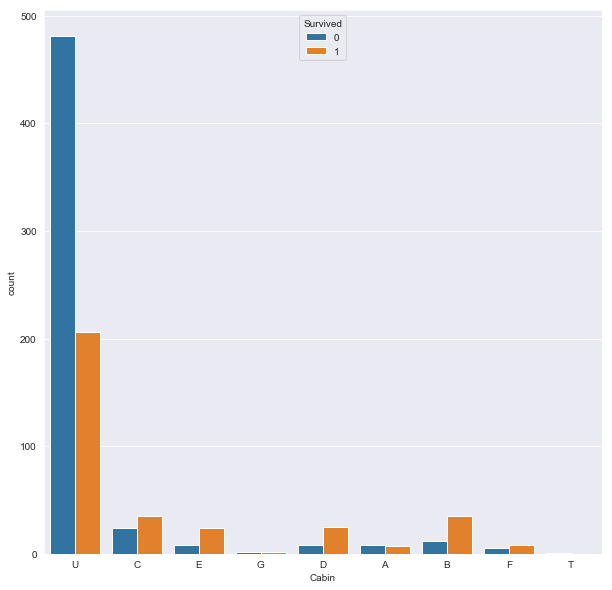

In [271]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x = 'Cabin', data = df_train, hue = 'Survived' )

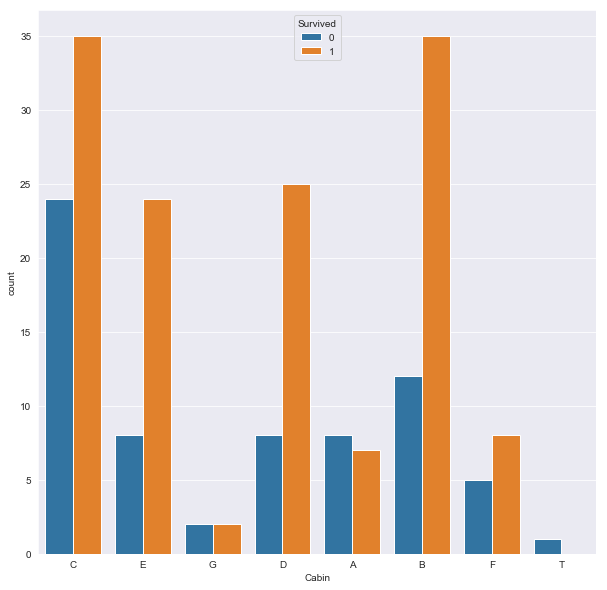

In [272]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x = 'Cabin', data = df_train[df_train['Cabin']!= 'U'], hue = 'Survived' )

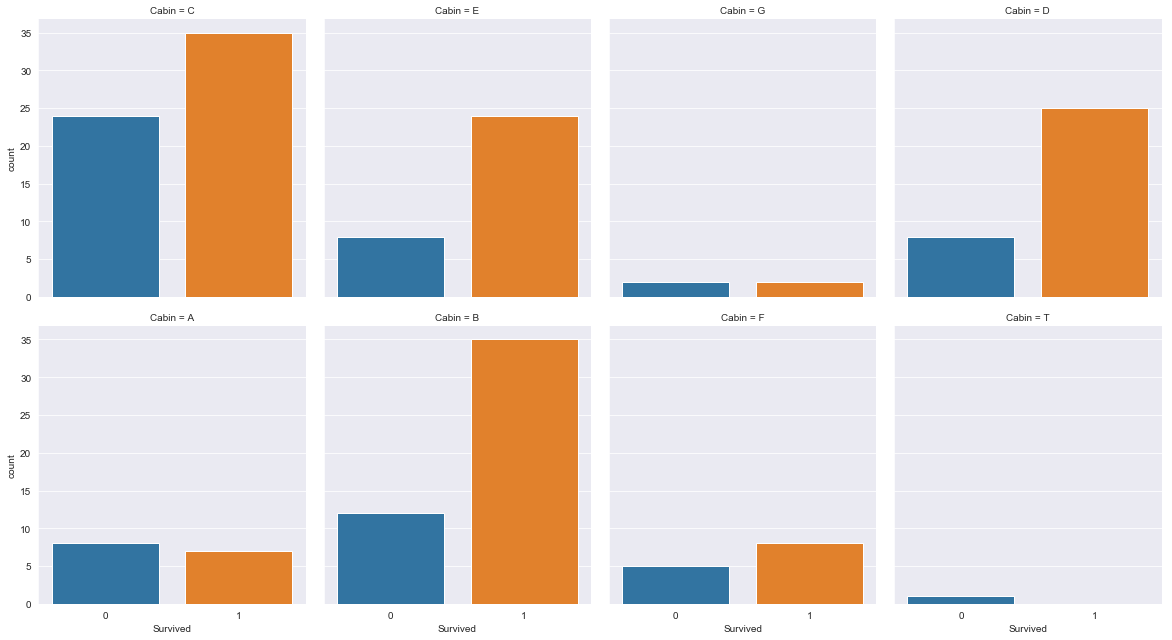

In [273]:

sns.catplot('Survived', col='Cabin', col_wrap=4, data=df_train[df_train.Cabin != 'U'], kind='count', height=4.5, aspect=.9)

In [274]:
df_test['Fare'].isnull().sum()

1

In [275]:
print(df_test.groupby(['Pclass','Cabin'])['Fare'].median())

Pclass  Cabin
1       A        30.50000
        B        87.88335
        C        90.00000
        D        51.86250
        E        83.15830
        U        31.68330
2       D        14.45415
        F        13.00000
        U        18.50000
3       F         7.22920
        G        16.70000
        U         7.89580
Name: Fare, dtype: float64


In [276]:
df_test['Fare'] = df_test.groupby(['Pclass','Cabin'])['Fare'].apply(lambda x : x.fillna(x.median()))

In [277]:
df_test['Fare'].isnull().sum()

0

In [278]:
df_train.groupby(['Cabin']).mean()[df_train.groupby(['Cabin']).mean().columns[1:2]]

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
U,0.299854


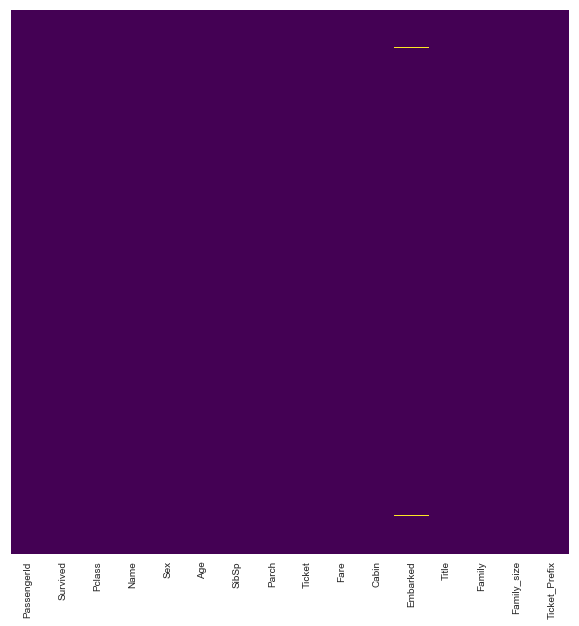

In [279]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data=df_train.isnull() , cmap = 'viridis',yticklabels=False,cbar= False)

In [280]:
df_train['Embarked'].isnull().sum()


2

In [281]:
df_train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Family,Family_size,Ticket_Prefix
Embarked,,,,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644


In [282]:
df_train.loc[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Family_size,Ticket_Prefix
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,Miss,0,Single,None
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,Mrs,0,Single,None


In [283]:
df_train.drop([61,829],inplace =True)

In [284]:
df_train.count()

PassengerId      889
Survived         889
Pclass           889
Name             889
Sex              889
Age              889
SibSp            889
Parch            889
Ticket           889
Fare             889
Cabin            889
Embarked         889
Title            889
Family           889
Family_size      889
Ticket_Prefix    889
dtype: int64

In [285]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Family_size,Ticket_Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,1,Small Family,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,1,Small Family,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,0,Single,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,1,Small Family,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,0,Single,None


In [286]:
to_drop =['Name','SibSp','Parch','Ticket']

for x in to_drop:
    df_train.drop([x], axis = 1 , inplace = True)
    df_test.drop([x], axis = 1 , inplace = True)
     

In [287]:
df_train.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Sex               object
Age              float64
Fare             float64
Cabin             object
Embarked          object
Title             object
Family             int64
Family_size       object
Ticket_Prefix     object
dtype: object

In [288]:
for col in df_train.columns:
    if df_train[col].dtype== 'object' or col== 'Pclass':
        dummies = pd.get_dummies(df_train[col])
        dummies = dummies.add_prefix('{}_'.format(col))
        df_train.drop(col, axis = 1, inplace =True)
        df_train = df_train.join(dummies)

In [289]:
for col in df_test.columns:
    if df_test[col].dtype== 'object' or col== 'Pclass':
        dummies = pd.get_dummies(df_test[col])
        dummies = dummies.add_prefix('{}_'.format(col))
        df_test.drop(col, axis = 1, inplace =True)
        df_test = df_test.join(dummies)

In [290]:
df_train

,PassengerId,Survived,Age,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Family_size_Large Family,Family_size_Medium Family,Family_size_Single,Family_size_Small Family,Ticket_Prefix_A./5.,Ticket_Prefix_A.5.,Ticket_Prefix_A/4,Ticket_Prefix_A/4.,Ticket_Prefix_A/5,Ticket_Prefix_A/5.,Ticket_Prefix_A/S,Ticket_Prefix_A4.,Ticket_Prefix_C,Ticket_Prefix_C.A.,Ticket_Prefix_C.A./SOTON,Ticket_Prefix_CA,Ticket_Prefix_CA.,Ticket_Prefix_F.C.,Ticket_Prefix_F.C.C.,Ticket_Prefix_Fa,Ticket_Prefix_None,Ticket_Prefix_P/PP,Ticket_Prefix_PC,Ticket_Prefix_PP,Ticket_Prefix_S.C./A.4.,Ticket_Prefix_S.C./PARIS,Ticket_Prefix_S.O./P.P.,Ticket_Prefix_S.O.C.,Ticket_Prefix_S.O.P.,Ticket_Prefix_S.P.,Ticket_Prefix_S.W./PP,Ticket_Prefix_SC,Ticket_Prefix_SC/AH,Ticket_Prefix_SC/AHBasle,Ticket_Prefix_SC/PARIS,Ticket_Prefix_SC/Paris,Ticket_Prefix_SCO/W,Ticket_Prefix_SO/C,Ticket_Prefix_SOTON/O.Q.,Ticket_Prefix_SOTON/O2,Ticket_Prefix_SOTON/OQ,Ticket_Prefix_STON/O2.,Ticket_Prefix_SW/PP,Ticket_Prefix_W./C.,Ticket_Prefix_W.E.P.,Ticket_Prefix_W/C,Ticket_Prefix_WE/P
0,1,0,22.0,7.2500,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,38.0,71.2833,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,26.0,7.9250,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,1,35.0,53.1000,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,35.0,8.0500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,0,26.0,8.4583,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,54.0,51.8625,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,0,2.0,21.0750,4,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,1,27.0,11.1333,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,1,14.0,30.0708,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [291]:
X_train = df_train.drop('Survived',axis=1)
Y_train = df_train['Survived']
X_test  = df_test

In [292]:
clf = RandomForestClassifier(n_estimators = 15,
                                criterion = 'gini',
                                max_features = 'sqrt',
                                max_depth = None,                                
                                min_samples_split =7,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 18)

clf = clf.fit(X_train, Y_train)
importances = clf.feature_importances_
std = np.std([forest.feature_importances_ for forest in clf.estimators_], axis =0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking

print("Feature Ranking:")

for f in range(X_train.shape[1]): 
    print("%d. feature %d %s (%f)" % (f +1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest



Feature Ranking:
1. feature 7 Sex_female (0.190434)
2. feature 23 Title_Mr (0.157308)
3. feature 8 Sex_male (0.132849)
4. feature 2 Fare (0.104436)
5. feature 1 Age (0.060372)
6. feature 24 Title_Mrs (0.047470)
7. feature 6 Pclass_3 (0.040945)
8. feature 22 Title_Miss (0.033234)
9. feature 3 Family (0.031082)
10. feature 0 PassengerId (0.027430)
11. feature 17 Cabin_U (0.025187)
12. feature 4 Pclass_1 (0.023037)
13. feature 27 Family_size_Large Family (0.019284)
14. feature 30 Family_size_Small Family (0.012982)
15. feature 25 Title_Officer (0.010264)
16. feature 5 Pclass_2 (0.010226)
17. feature 21 Title_Master (0.008699)
18. feature 10 Cabin_B (0.008203)
19. feature 20 Embarked_S (0.007399)
20. feature 18 Embarked_C (0.006541)
21. feature 19 Embarked_Q (0.005868)
22. feature 13 Cabin_E (0.004198)
23. feature 11 Cabin_C (0.004136)
24. feature 12 Cabin_D (0.003994)
25. feature 70 Ticket_Prefix_W./C. (0.003593)
26. feature 47 Ticket_Prefix_None (0.003375)
27. feature 28 Family_size_Medi

In [293]:
np.argsort(clf.feature_importances_)[::-1]

array([ 7, 23,  8,  2,  1, 24,  6, 22,  3,  0, 17,  4, 27, 30, 25,  5, 21,
       10, 20, 18, 19, 13, 11, 12, 70, 47, 28, 49, 68, 29, 65, 43, 14, 42,
       73, 26, 50, 40, 61,  9, 15, 56, 57, 58, 59, 60, 38, 55, 62, 63, 64,
       66, 67, 69, 71, 16, 53, 54, 39, 72, 35, 34, 33, 32, 31, 41, 37, 44,
       45, 46, 48, 51, 52, 36], dtype=int64)

In [294]:
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='sqrt', max_leaf_nodes=18,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=7,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1170350919, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='sqrt', max_leaf_nodes=18,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=7,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1450717444, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='sqrt', max_leaf_nodes=18,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=7,
             min_weight_f

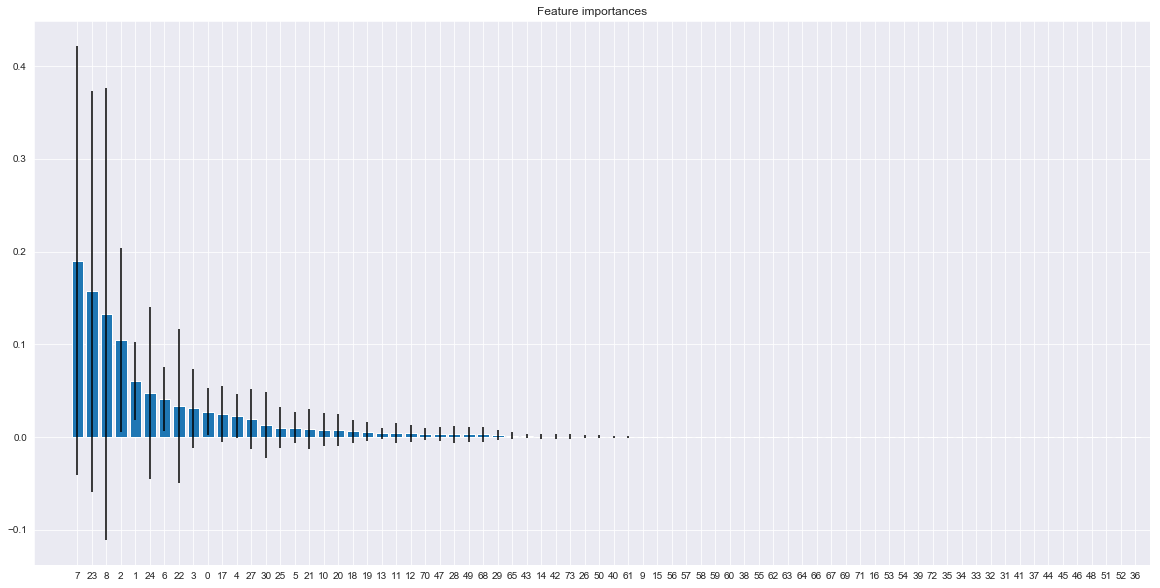

In [295]:
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),importances[indices],align="center", yerr=std[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-3, X_train.shape[1]])
plt.show()


In [296]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(X_train)
train_new.shape

(889, 13)

In [297]:
best_features = X_train.columns[indices[0: train_new.shape[1]]]
X = X_train[best_features]
Xt = X_test[best_features]

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=44)

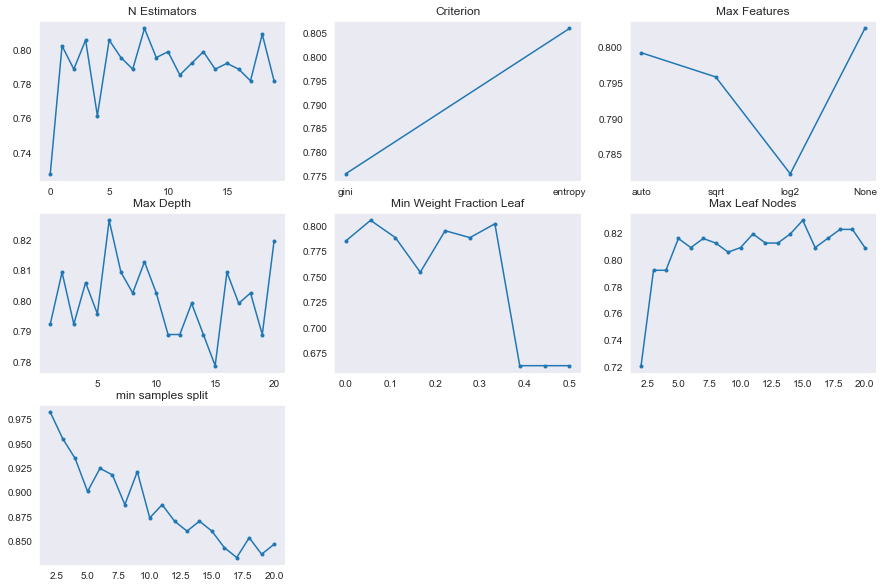

In [299]:
plt.figure(figsize=(15,10))

#N Estimators
plt.subplot(3,3,1)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(n_estimators=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('N Estimators')
plt.grid();



#Criterion
plt.subplot(3,3,2)
feature_param = ['gini','entropy']
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(criterion=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.title('Criterion')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Features
plt.subplot(3,3,3)
feature_param = ['auto','sqrt','log2',None]
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_features=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Max Features')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Depth
plt.subplot(3,3,4)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_depth=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Depth')
plt.grid();

#Min Samples Split

plt.subplot(3,3,7)

featue_min_sample =range(2,21)
scores =[]
for i in featue_min_sample:
    clf = RandomForestClassifier(min_samples_split= i)
    clf.fit(X_test,y_test)
    scores.append(clf.score(X_test,y_test))
plt.plot(featue_min_sample, scores, '.-')
plt.title("min samples split")
plt.axis('tight')
plt.grid();


#Min Weight Fraction Leaf
plt.subplot(3,3,5)
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(min_weight_fraction_leaf =feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Weight Fraction Leaf')
plt.grid();

#Max Leaf Nodes
plt.subplot(3,3,6)
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_leaf_nodes=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Leaf Nodes')
plt.grid();


In [302]:
#forest = RandomForestClassifier(max_depth = 50,                                
                                #min_samples_split =7,
                                #min_weight_fraction_leaf = 0.0,
                                #max_leaf_nodes = 18)

parameter_grid = {'n_estimators' : [15, 100, 200],
                  'criterion' : ['gini', 'entropy'],
                  'max_features' : ['auto', 'sqrt', 'log2', None],
                  'max_depth' : [None, 20],
                  'min_samples_split' : [2, 11],
                  'min_weight_fraction_leaf' : [0.0, 0.2],
                  'max_leaf_nodes' : [8,11],
                 }

grid_search = GridSearchCV(forest, param_grid=parameter_grid, cv=StratifiedKFold(5))
grid_search.fit(X, Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.829021372328459
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}


In [315]:
forest = RandomForestClassifier(max_depth = None,                                
                                min_samples_split =2,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 8,
                                criterion = 50,
                                n_estimators = 100,
                                max_features = None)

clf.fit(X, Y_train)
Y_pred_RF = clf.predict(Xt)


                                
                               
                               
                               